In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


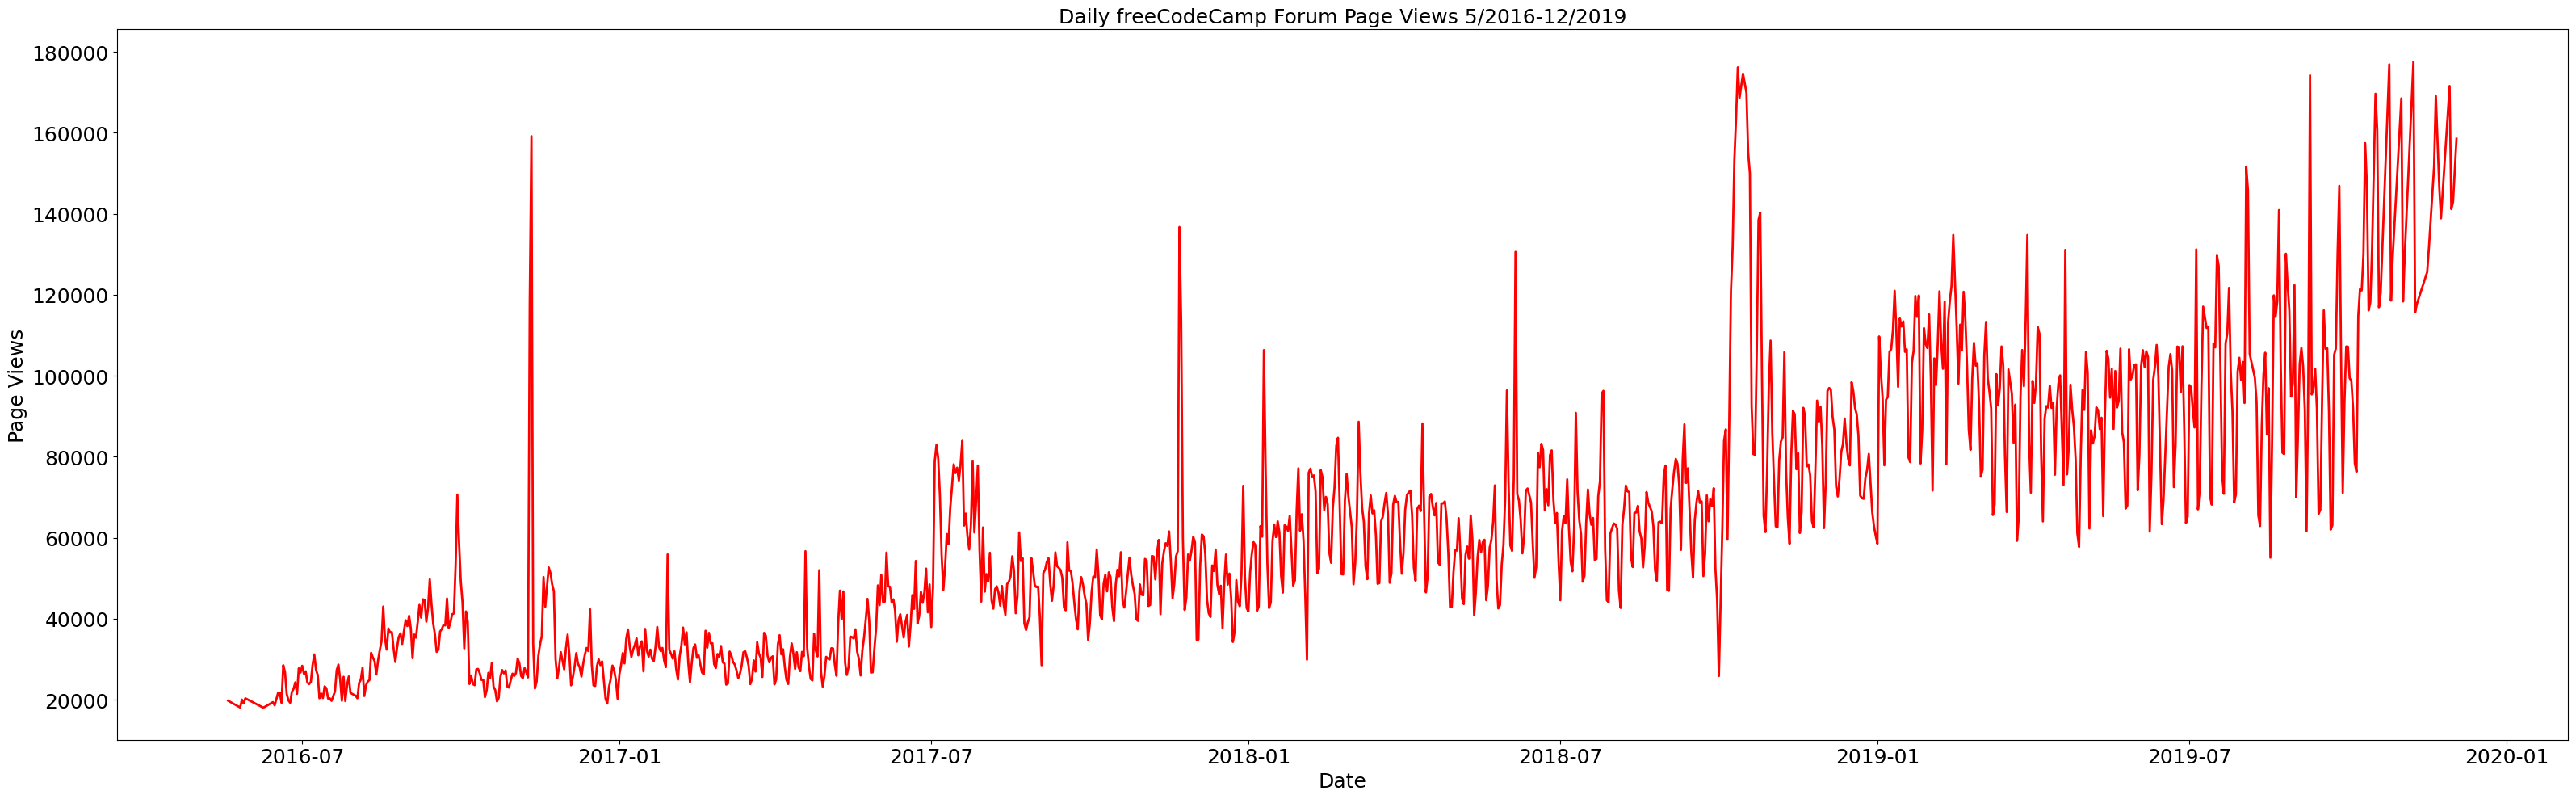

In [5]:
fig, axs = plt.subplots(figsize=(32, 10), squeeze=True, tight_layout=True)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
axs.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=18)
axs.set_ylabel('Page Views', fontsize=18)
axs.set_xlabel('Date', fontsize=18)
axs.tick_params(labelsize=18)
axs.plot(df, color='red', linewidth=2)


In [6]:
df_bar = df.reset_index().copy()
df_bar

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [7]:
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_bar['month'] = pd.Categorical(df_bar['month'], categories=months, ordered=True)
df_bar.drop('date', axis=1, inplace=True)
df_bar

,value,year,month
0,19736,2016,May
1,18060,2016,May
2,19997,2016,May
3,19044,2016,May
4,20325,2016,May
...,...,...,...
1233,138875,2019,November
1234,171584,2019,November
1235,141161,2019,November
1236,142918,2019,December


In [8]:
# df_bar = df_bar.groupby(['year', 'month']).mean().reset_index()
df_bar = df_bar.groupby(['year', 'month']).mean().unstack(level=-1)
# df_bar.dropna(axis=1, inplace=True)
df_bar

value                                                           \
month        January       February         March         April           May   
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month          June          July         August     September        October   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month       November       December  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

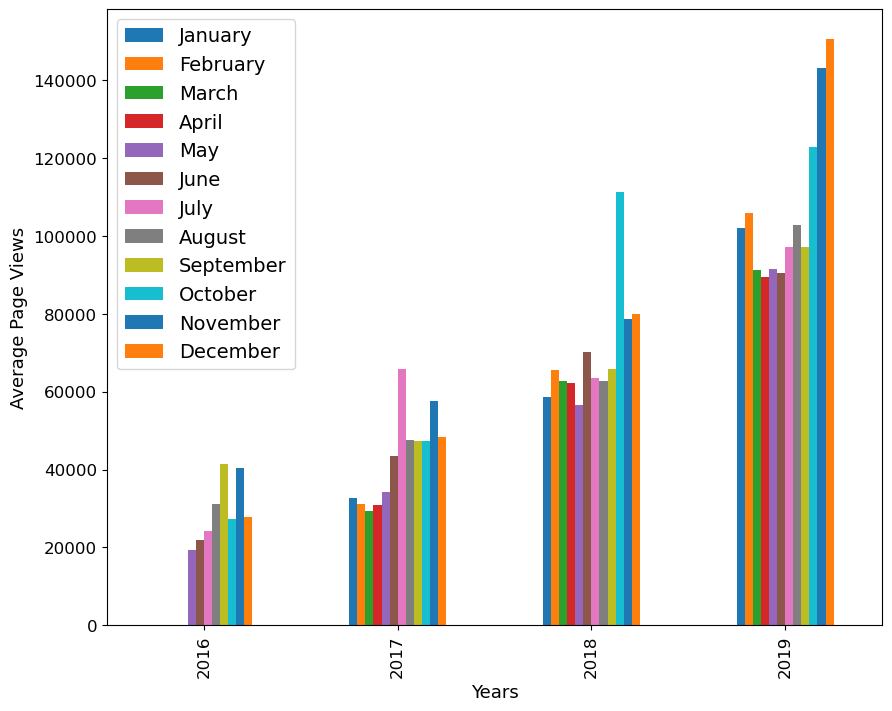

In [9]:
# my first solution

fig = df_bar.plot(kind='bar', figsize=(10, 8)).figure
plt.legend(months, fontsize=14)
plt.xlabel('Years', fontsize=13)
plt.ylabel('Average Page Views', fontsize=13)
plt.tick_params(labelsize=12)

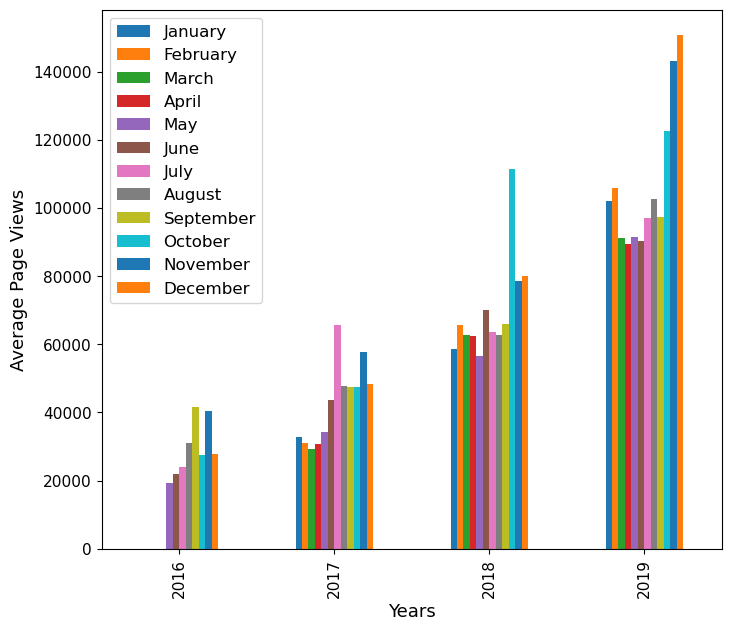

In [10]:
# solution with creation of the figure from the ax
ax = df_bar.plot(kind='bar')
fig = ax.get_figure()
fig.set_size_inches(8, 7)
ax.set_xlabel('Years', fontsize=13)
ax.set_ylabel('Average Page Views', fontsize=13)
ax.legend(months, fontsize=12)
ax.tick_params(labelsize=11)

In [115]:
df_box = df.copy().reset_index()
# df_box['year'] = [d.strftime('%Y') for d in df_box.date]
df_box["year"] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# df_box['month_num'] = df_box['date'].dt.month
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 36.72222222222221, 'Month')

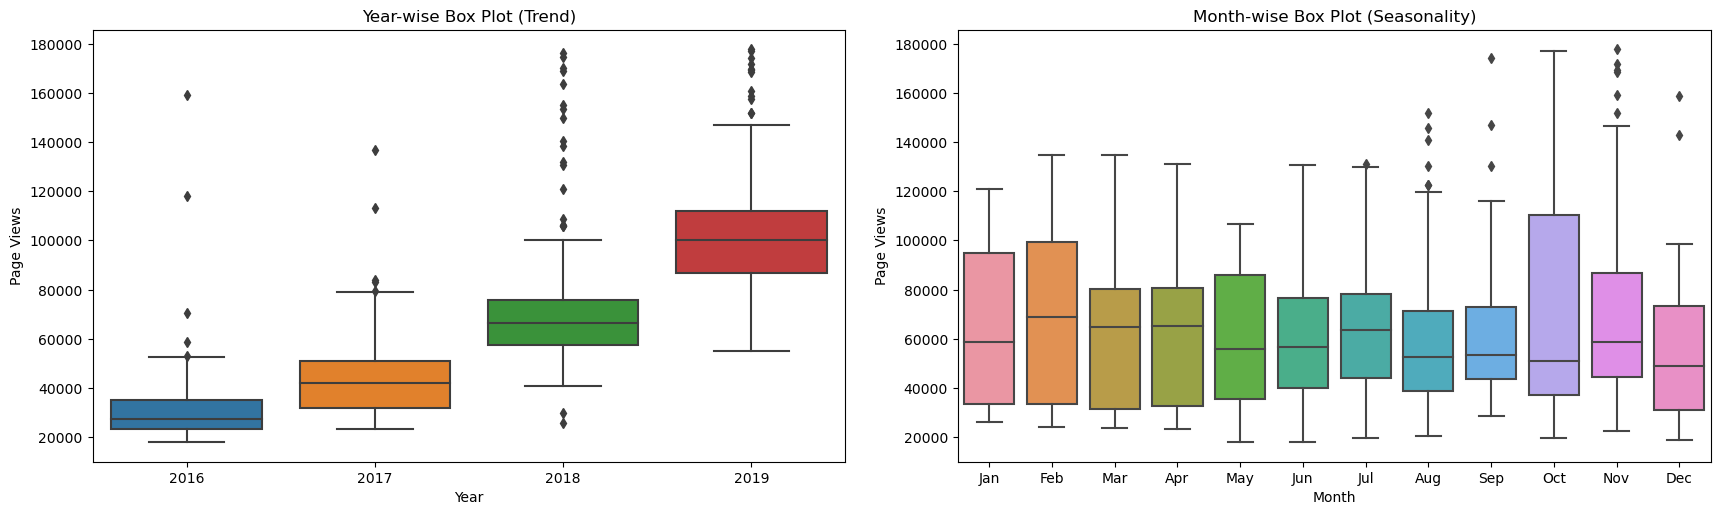

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)
plt.tight_layout(pad=5)

sns.boxplot(ax=axes[0], data=df_box, x='year', y='value')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')

order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ]
sns.boxplot(ax=axes[1], data=df_box, x='month', y='value', order=order)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')